### 보스턴 주택 값 예측하기(회귀)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston  # 보스턴 주택 값 데이터

In [81]:
boston = load_boston() # 데이터 가져오기

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [82]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [83]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [84]:
boston.target # 집 값들이 다양한 숫자로 나타나고 있음

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [85]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [86]:
# DataFrame으로 만들기
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [87]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [88]:
boston_df.shape

(506, 13)

In [89]:
# X데이터
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [90]:
# y데이터
house_price = boston.target # 보스턴 주택 값

In [91]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### train, test로 분리

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, house_price, test_size=0.3)

In [94]:
X_train.shape, y_train.shape

((354, 13), (354,))

In [95]:
X_test.shape, y_test.shape

((152, 13), (152,))

In [96]:
boston_copy = X_train.copy()
boston_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
118,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
168,2.30040,0.0,19.58,0.0,0.605,6.319,96.1,2.1000,5.0,403.0,14.7,297.09,11.10
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74
132,0.59005,0.0,21.89,0.0,0.624,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12
328,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4.0,430.0,16.9,382.44,9.97
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35


In [97]:
# 정답 컬럼 추가하기
boston_copy['PRICE'] = y_train
boston_copy.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
118,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37,20.4


In [98]:
import seaborn as sns

<AxesSubplot:>

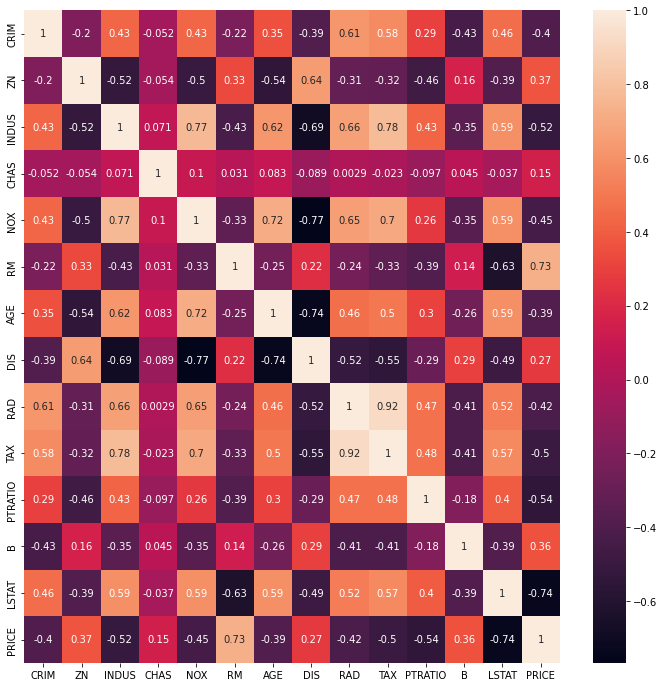

In [99]:
# boston_df.corr() == 상관계수
plt.figure(figsize=(12, 12))
sns.heatmap(boston_copy.corr(), annot=True) # 열 분포 그래프

### LinearRegrssion

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [101]:
# 모델 생성하기
linear_model = LinearRegression()

In [102]:
# 학습하기
linear_model.fit(X_train, y_train)

LinearRegression()

In [103]:
linear_model.score(X_train, y_train) # R2score : sklearn에서 R2score라는 값을 제공한다

0.7639993034343293

In [104]:
linear_model.score(X_test, y_test)

0.6403564080001575

In [105]:
result = cross_val_score(linear_model, X_train, y_train, cv=5)
result

array([0.80855119, 0.7820294 , 0.71689997, 0.5215116 , 0.6949201 ])

### 특성확장
- (선형모델을 더 잘 다루기 위해서)

In [106]:
extended_X_train = X_train.copy()

In [107]:
for col1 in X_train.columns:
    for col2 in X_train.columns:
        extended_X_train[col1 + 'x' + col2] = X_train[col1] * X_train[col2]

C:\Users\smhrd\AppData\Local\Temp\ipykernel_22492\3541594611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_train[col1 + 'x' + col2] = X_train[col1] * X_train[col2]
C:\Users\smhrd\AppData\Local\Temp\ipykernel_22492\3541594611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_train[col1 + 'x' + col2] = X_train[col1] * X_train[col2]
C:\Users\smhrd\AppData\Local\Temp\ipykernel_22492\3541594611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

In [108]:
extended_X_train.shape

(354, 182)

In [109]:
# 데이터 학습
linear_model2 = LinearRegression()
linear_model2.fit(extended_X_train, y_train)

LinearRegression()

In [110]:
result2 = cross_val_score(linear_model2, extended_X_train, y_train, cv=5)
result2

array([0.91739074, 0.87924638, 0.869181  , 0.5300286 , 0.71242227])

In [111]:
result2.mean()

0.7816537958314821

In [112]:
extended_X_test = X_test.copy()

In [113]:
for col1 in X_test.columns:
    for col2 in X_test.columns:
        extended_X_test[col1 + 'x' + col2] = X_test[col1] * X_test[col2]

C:\Users\smhrd\AppData\Local\Temp\ipykernel_22492\903382376.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_test[col1 + 'x' + col2] = X_test[col1] * X_test[col2]
C:\Users\smhrd\AppData\Local\Temp\ipykernel_22492\903382376.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_test[col1 + 'x' + col2] = X_test[col1] * X_test[col2]
C:\Users\smhrd\AppData\Local\Temp\ipykernel_22492\903382376.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

In [114]:
extended_X_test.shape

(152, 182)

In [115]:
linear_model2.predict(extended_X_test)

array([21.54075973, 21.65598838, 18.93701443, 22.620061  , 26.76646888,
       26.55462842, 22.63638729, 22.06940292, 24.67416599, 43.50750174,
       26.6385485 , 18.10686431, 38.66749604, 22.45978608, 16.93498024,
       18.85242493, 17.06753978, 13.39812783, 14.98165442, 16.75081853,
       11.95559272, 32.67078836, 18.76219179, 11.60616462, 20.1824785 ,
       23.46826199, 18.13139666, 16.31497888, 16.48350668, 11.51216112,
       -3.10893269, 35.20194282, 21.60207786, 21.56499257, 24.91761597,
       36.6260765 , 19.17762379, 29.37106825, 13.43797673, 22.43089691,
       38.43281415, 42.10753162, 26.29233709, 21.09820963,  1.0786639 ,
       14.63498104, 26.85055182, 47.40288511, 22.8806738 , 26.63042252,
        7.32871912,  1.94161714, 21.93719153, 24.60976457, 10.79733887,
       23.55424919, 50.98106844, 25.79837315, 14.60179771, 20.33938247,
       11.18545803, 22.01378325, 17.14259529, 34.02696515, 26.95097562,
       16.73692928, 10.61251813, 48.08242022, 22.99625399, 23.09

In [116]:
linear_model2.score(extended_X_test, y_test)

0.7462113940202226

### Ridge

In [117]:
from sklearn.linear_model import Ridge

In [118]:
ridge_model = Ridge()

In [121]:
ridge_model.fit(extended_X_train, y_train)

Ridge()

In [122]:
ridge_model.score(extended_X_train, y_train)

0.9357354777493707

In [123]:
ridge_model.score(extended_X_test, y_test)

0.7645239260356922

### Lasso

In [124]:
from sklearn.linear_model import Lasso

In [125]:
lasso_model = Lasso()

In [126]:
lasso_model.fit(extended_X_train, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e+03, tolerance: 3.255e+00
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [127]:
lasso_model.score(extended_X_train, y_train)

0.8981602663768496

In [128]:
lasso_model.score(extended_X_test, y_test)

0.782975414903348

### Ridge vs Lasso
- 제약조건에 따른 두 모델의 가중치 확인
- Lasso : L1 규제 사용, 특정 계수가 0이 될 수 있다 => 특성 선택이 이루어짐
- Ridge : L2 규제 사용, 규제가 골고루 적용 => 0에 가까워짐(0은 아님!!)

In [129]:
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000] 
# 0을 작성안하는 이유 => 0을 준다는 거는 정규화항을 사용안하는 거랑 같다 

ridge_coef_list = []
lasso_coef_list = []

for a in alpha_list:
    r_model = Ridge(alpha = a)  # 제약조건에 따른 모델 생성
    l_model = Lasso(alpha = a)
    
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [132]:
r_df = pd.DataFrame(np.array(ridge_coef_list).T,
            columns=alpha_list)
r_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.095204,-0.095134,-0.094502,-0.089675,-0.089721,-0.075777
1,0.031331,0.031345,0.031481,0.034301,0.039922,0.046032
2,-0.024968,-0.025516,-0.030512,-0.082611,-0.106224,-0.090123
3,3.544056,3.540899,3.510778,2.222105,0.541889,0.074569
4,-15.441404,-15.308264,-14.093068,-1.447841,-0.152623,-0.006716
5,4.682522,4.683631,4.693317,4.354064,2.336472,0.497601
6,-0.017079,-0.017190,-0.018197,-0.024485,-0.005306,0.026782
7,-1.509809,-1.507613,-1.487577,-1.278218,-1.144016,-0.502385
8,0.273301,0.272927,0.269538,0.254655,0.315040,0.300832
9,-0.011398,-0.011405,-0.011466,-0.012985,-0.015455,-0.016389


In [133]:
l_df = pd.DataFrame(np.array(lasso_coef_list).T,
            columns=alpha_list)
l_df
# 1000일때는 0.0이다 => 제약조건이 너무 걸려있어서 0이 나왔음

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.095015,-0.093247,-0.086204,-0.000000,-0.000000,-0.0
1,0.031366,0.031698,0.033085,0.034529,0.000000,0.0
2,-0.026160,-0.037435,-0.069043,-0.000000,-0.000000,-0.0
3,3.522419,3.324499,1.564325,0.000000,0.000000,0.0
4,-15.106568,-11.958735,-0.000000,0.000000,-0.000000,-0.0
5,4.683206,4.690477,4.529055,0.000000,0.000000,0.0
6,-0.017313,-0.019529,-0.024682,0.000000,-0.000000,-0.0
7,-1.503655,-1.446061,-1.191628,-0.000000,0.000000,0.0
8,0.272464,0.264561,0.244580,0.000000,-0.000000,-0.0
9,-0.011424,-0.011657,-0.013230,-0.010521,-0.022353,-0.0


In [134]:
# 어느정도 제약조건을 주어야 좋을까?
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000] 
scoce_list = []

for a in alpha_list:
    ridge_model = Ridge(alpha = a)
    ridge_result = cross_val_score(ridge_model, extended_X_train, y_train, cv=5)
    scoce_list.append(ridge_result.mean())

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.88926e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.01379e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.5272e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.03053e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlg

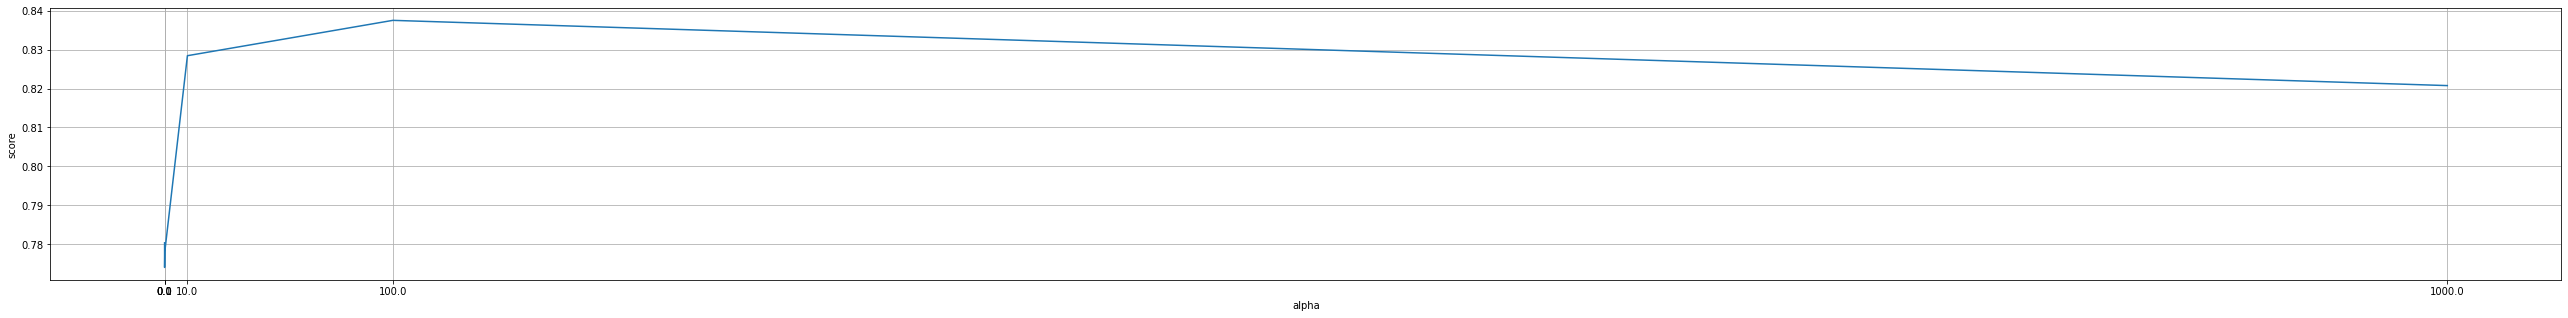

In [137]:
plt.figure(figsize=(45,5))
plt.plot(alpha_list, scoce_list)
plt.xticks(alpha_list)
plt.grid()
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

### 결정 트리 회귀 모형

In [138]:
from sklearn.tree import DecisionTreeRegressor # 회귀

In [139]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=11)

In [140]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=11)

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
tree_reg2 = DecisionTreeRegressor()

In [143]:
params = {'max_depth' : [3,5,7],
         'max_leaf_nodes' : [4,6,8],
         'min_samples_split' : [4,6,8],
         'min_samples_leaf' : [3,5,7]}

grid = GridSearchCV(tree_reg2, params, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [4, 6, 8],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [4, 6, 8]})

In [145]:
grid.best_params_ # 가장 좋은 성능의 조합을 보여준다

{'max_depth': 7,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [146]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.7759318178658656


In [147]:
# gridSearch를 통해 가장 좋은 성능을 보이는 모델 제공
best_model = grid.best_estimator_

In [149]:
pred_test = best_model.predict(X_test) # 예측한 값

In [150]:
pred_train = best_model.predict(X_train)

In [151]:
from sklearn.metrics import mean_squared_error

In [153]:
# 성능 평가하기
print("학습 데이터에 대한 평가 결과", mean_squared_error(pred_train, y_train))
print("학습 데이터에 대한 평가 결과", mean_squared_error(pred_test, y_test))

학습 데이터에 대한 평가 결과 13.713538411503624
학습 데이터에 대한 평가 결과 18.74011131868334


### 랜덤 포레스트 회귀 모형

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rf_reg = RandomForestRegressor()

In [156]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()